## Training and Validation Set
### Target Variable as first column followed by input features
### Training, Validation files do not have a column header

2.0. Import libraries

In [ ]:
import os
import logging
from config.config import Paths
import pandas as pd
from models.dataset_builder import Split_Dataset
from models.regressor import PycaretModels
from utils import featuring
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

paths = Paths


2.1. Splittng Training / Validation Dataset

Considering a proportional 70% Train | 30% Validation data

In [ ]:
Train, Validation, Test = Split_Dataset.StdFormat(os.path.join(paths.data,'dataset.csv'),
                                                    paths)

2.2 Train an evaluate best-fit model with PyCaret Module 
Regressors considered:

gbr:	Gradient Boosting Regressor	<br>
et_:	Extra Trees Regressor	<br>
rf:	    Random Forest Regressor	<br>
lightgbm:	Light Gradient Boosting Machine<br>
lr:  	Linear Regression	<br>
ridge:	Ridge Regression<br>
br: 	Bayesian Ridge<br>
dt: 	Decision Tree Regressor	<br>
omp: 	Orthogonal Matching Pursuit	<br>
knn: 	K-Neighbors Regressor	<br>
en: 	Elastic Net	<br>
ada: 	AdaBoost Regressor	<br>
lasso: 	Lasso Regression<br>
huber:	Huber Regressor<br>
lar:	Least Angle Regression<br>
par:	Passive Aggressive Regressor	<br>
llar:	Lasso Least Angle Regression	<br>
dummy:	Dummy Regressor	<br>
s
ref: https://pycaret.gitbook.io/docs/get-started/quickstart#regression

In [2]:
best_model = PycaretModels.Compare(Train,Validation,'monto_total')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


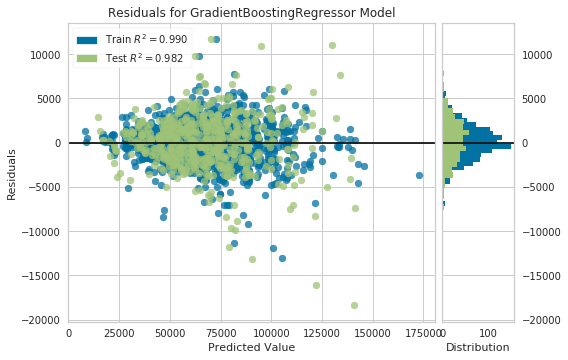

In [3]:
PycaretModels.ResidualsPlot(best_model)

2.3. Testing Model Predictions with 2022-Feb Dataset


In [4]:

test_df   = pd.read_csv(os.path.join(paths.storage_path,'dataset_ts_ventas_test.csv'), parse_dates=['ds'],index_col=0)
test_data = featuring.data.add_features(test_df)
test_forecast = PycaretModels.TestDataForecast(test_data, best_model)


BestModel PErformance on Test Dataset 2022-Feb


2.3.1 Plotting Testing results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


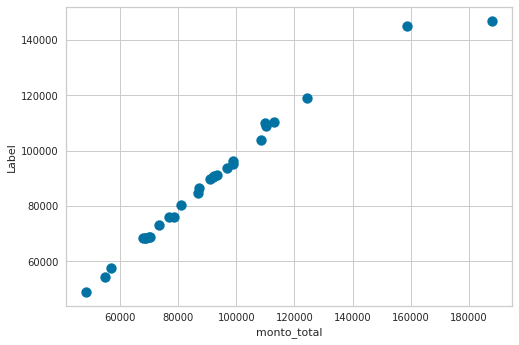

In [5]:
# Draw a scatter plot
test_forecast.plot.scatter(x = 'monto_total', y = 'Label', s = 100);

Text(0.5, 1.0, 'Test Data Model Compared')

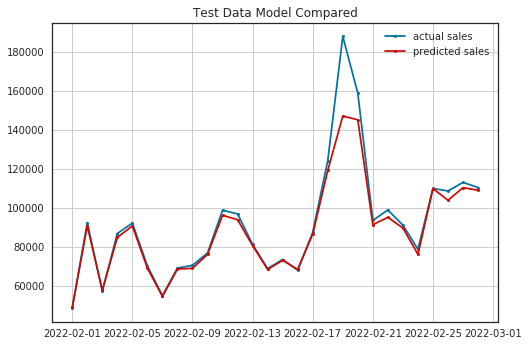

/home/ec2-user/SageMaker/MapLayers/maplayers/env/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/SageMaker/MapLayers/maplayers/env/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ec2-user/SageMaker/MapLayers/maplayers/env/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs faile

In [8]:

sb.set_style("white")
fig, ax = plt.subplots()
plt.plot(test_forecast.index, test_forecast.monto_total, "o-", color="b", ms=3,
            label='actual sales')
plt.plot(test_forecast.index, test_forecast.Label, "o-", ms=3,
            color="r", label='predicted sales')
ax.legend()
ax.grid()
plt.title("Test Data Model Compared")

2.4 Saving Model Weights on <sales_best.pkl> file

In [ ]:
PycaretModels.SaveWeights(best_model)